# Dolan Creek Streamflow, Continued ...

Plotting and visualization of the preprocessed stream flow record

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

In [3]:
IN_FILE = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stocha' \
          r'stic_CC_Recharge\Data\Surface_Water\DolanProcessed_Hr.xlsx'
DY_SHT = "DYr_Stats"
MN_SHT = "Monthly"
DL_SHT = "Daily"
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
          r'charge\Data\Surface_Water'
PLOT_DIR = "Plots"
PRISM_CTR = 670764
PRISM_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
           r'charge\Data\Weather\PRISM_Daily\PRISM_AOI_Pts_ppt-Processed.xlsx'
PRISM_SHT = "Daily"

Load and process

In [4]:
DailyDF = pd.read_excel( IN_FILE, sheet_name=DL_SHT, header=0, index_col=0, parse_dates=True )

In [5]:
display( HTML( DailyDF.head().to_html() ) )

,Discharge_cfs,Q_ft3,Q_af,Q_m3
DateTime_UTC,,,,
2011-11-16,18.625000,1609200.0,36.942149,45567.469328
2011-11-17,18.503125,1598670.0,36.700413,45269.292935
2011-11-18,18.671875,1613250.0,37.035124,45682.152556
2011-11-19,18.748958,1619910.0,37.188017,45870.742754
2011-11-20,18.852083,1628820.0,37.392562,46123.045856


In [6]:
DisMax = round( DailyDF['Q_af'].max(), -1 )
DisMax

100.0

In [7]:
DayYrDF = pd.read_excel( IN_FILE, sheet_name=DY_SHT, header=0, index_col=0 )

In [8]:
display( HTML( DayYrDF.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Day_Yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20.678926,20.785286,20.891645,20.998005,21.104364,21.210724,21.317083,21.423443,21.529802,21.636162,21.742521,21.848881,21.955240,22.061600,22.167959,22.333885,22.523636,22.713388,22.903141,23.092892,23.282644,23.472397,23.662149,23.851900,24.041653,24.231405,24.421156,24.610909,24.800661,24.917149,24.935951,24.954752,24.973555,24.992355,25.011158,25.029959,25.048759,25.067562,25.086363,25.105165,25.123966,25.142769,25.161570,25.237810,25.658678,26.079544,26.500414,26.921280,27.342148,27.763018,28.183884,28.604752,29.025620,29.446486,29.867357,30.288223,30.709091,31.129959,31.202190,31.216316,31.230440,31.244566,31.258692,31.272818,31.286942,31.301067,31.315193,31.329319,31.343443,31.357569,31.371695,31.385820,31.624298,32.031040,32.437782,32.844524,33.251266,33.658009,34.064751,34.471497,34.878235,35.284981,35.691719,36.098465,36.505203,36.911949,38.099876,41.240772,44.381645,47.522541,50.663418,53.804333,56.945210,60.086105,63.226978,66.367874,69.508751,72.649651,75.790543,78.931442,82.072311,34.352600,351.514313,1.947232,2.318744
2,20.720247,20.796091,20.871933,20.947777,21.023621,21.099463,21.175306,21.251148,21.326992,21.402834,21.478678,21.554522,21.630363,21.706207,21.782049,21.994421,22.261404,22.528389,22.795372,23.062355,23.329338,23.596321,23.863306,24.130289,24.397272,24.664257,24.931240,25.198223,25.465206,25.618265,25.619421,25.620579,25.621735,25.622892,25.624050,25.625206,25.626364,25.627522,25.628677,25.629835,25.630991,25.632149,25.633307,25.693657,26.109173,26.524689,26.940207,27.355722,27.771238,28.186756,28.602272,29.017788,29.433306,29.848822,30.264339,30.679855,31.095373,31.510889,31.669174,31.784586,31.900000,32.015411,32.130825,32.246239,32.361652,32.477066,32.592480,32.707893,32.823307,32.938721,33.054131,33.169544,33.303223,33.450600,33.597977,33.745350,33.892727,34.040104,34.187481,34.334854,34.482231,34.629608,34.776981,34.924358,35.071735,35.219112,36.260204,39.535606,42.810986,46.086384,49.361763,52.637188,55.912563,59.187965,62.463345,65.738747,69.014122,72.289520,75.564926,78.840324,82.115700,34.500671,348.341370,1.958497,2.371906
3,20.463223,20.604061,20.744902,20.885740,21.026579,21.167418,21.308256,21.449095,21.589933,21.730772,21.871611,22.012451,22.153290,22.294128,22.434967,22.598864,22.771984,22.945103,23.118223,23.291344,23.464462,23.637583,23.810703,23.983822,24.156942,24.330063,24.503181,24.676302,24.849422,24.959690,24.986156,25.012625,25.039091,25.065557,25.092026,25.118492,25.144958,25.171425,25.197893,25.224360,25.250826,25.277294,25.303761,25.397480,25.894711,26.391941,26.889174,27.386404,27.883636,28.380869,28.878099,29.375330,29.872561,30.369791,30.867025,31.364258,31.861488,32.358719,32.482189,32.543369,32.604546,32.665722,32.726902,32.788078,32.849255,32.910435,32.971611,33.032791,33.093967,33.155144,33.216324,33.277500,33.391239,33.544399,33.697563,33.850723,34.003883,34.157043,34.310207,34.463367,34.616528,34.769691,34.922852,35.076012,35.229172,35.382

Load the PRISM

In [9]:
PRDF = pd.read_excel( PRISM_IN, sheet_name=PRISM_SHT, header=0, index_col=0, 
                      parse_dates=True )

In [10]:
PRDF = PRDF[[PRISM_CTR]].copy()

In [11]:
display(HTML(PRDF.head().to_html()))

,670764
DateTime_UTC,
1981-01-01,0.0
1981-01-02,0.0
1981-01-03,0.0
1981-01-04,0.0
1981-01-05,0.0


In [12]:
MonthPrDF = PRDF.resample( 'MS', closed='left', label='left' ).sum()

In [13]:
#OFile = os.path.normpath( os.path.join( OUT_DIR, "PRISM_Center_Out.xlsx" ) )
#with pd.ExcelWriter( OFile ) as writer:
#    PRDF.to_excel( writer, sheet_name="Daily", na_rep=str(np.nan) )
#    MonthPrDF.to_excel( writer, sheet_name="Monthly", na_rep=str(np.nan) )
# end of with

In [14]:
MaxPrecip = round( PRDF[PRISM_CTR].max(), -1 )
MaxPrecip

100.0

In [15]:
StartDate = DailyDF.index[0]
EndDate = DailyDF.index[len(DailyDF) -1]
StartDate, EndDate

(Timestamp('2011-11-16 00:00:00'), Timestamp('2019-11-05 00:00:00'))

In [16]:
ProcIndexer = pd.date_range(start=StartDate, end=EndDate, freq='MS' )
ProcIndexer[:10]

DatetimeIndex(['2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [17]:
ItList = ProcIndexer.tolist()
type(ItList)

list

In [18]:
ItList[0].month, ItList[0].year

(12, 2011)

In [19]:
TestInd = ProcIndexer[0]
cMon = TestInd.month
cYr = TestInd.year

In [20]:
PSmallDF = PRDF.loc[(PRDF.index.year == cYr) & (PRDF.index.month == cMon)].copy()

In [21]:
DCSmallDF = DailyDF.loc[(DailyDF.index.year == cYr) & (DailyDF.index.month == cMon)].copy()

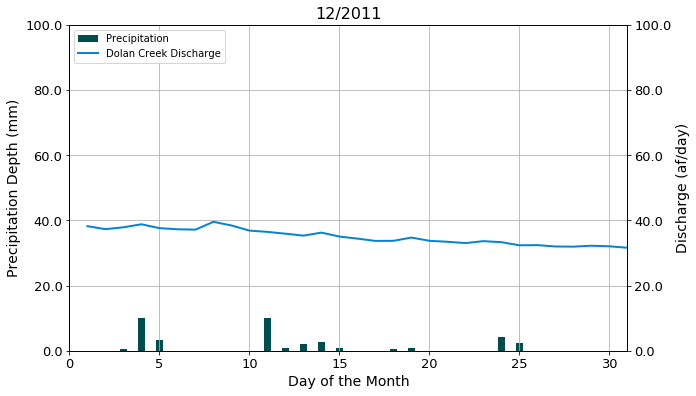

In [22]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax21 = ax11.twinx()
pBar = ax11.bar( PSmallDF.index.day, PSmallDF[PRISM_CTR], width=0.35, color='xkcd:dark teal',
          label="Precip" )
dLn, = ax21.plot( DCSmallDF.index.day, DCSmallDF['Q_af'], linestyle='-', linewidth=2,
           color='xkcd:cerulean', label='Dolan Creek' )
ax11.set_xlim( (0.0, 31.0))
ax11.set_ylim( (0.0, MaxPrecip) )
ax21.set_ylim( (0.0, DisMax ) )
ax11.set_title("%d/%d" % (cMon, cYr), fontsize=16)
ax11.set_xlabel('Day of the Month', fontsize=14 )
ax11.set_ylabel('Precipitation Depth (mm)', fontsize=14)
ax21.set_ylabel('Discharge (af/day)', fontsize=14)
ax11.grid( b=True )
ax11.legend( (pBar, dLn ), 
             ("Precipitation", "Dolan Creek Discharge" ),
             loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax21.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Now go through and output

In [23]:
for cT in ItList:
    cMon = cT.month
    cYr = cT.year
    PSmallDF = PRDF.loc[(PRDF.index.year == cYr) & (PRDF.index.month == cMon)].copy()
    if len(PSmallDF) < 1:
        continue
    DCSmallDF = DailyDF.loc[(DailyDF.index.year == cYr) & (DailyDF.index.month == cMon)].copy()
    # now the figure
    cFigName = "DolanCreek_%d_%d.png" % (cYr, cMon)
    FigPath = os.path.normpath( os.path.join( OUT_DIR, PLOT_DIR, cFigName ) )
    Fig1 = plt.figure()
    Fig1.set_size_inches(10.0, 6.0)
    ax11 = Fig1.add_subplot(111)
    ax21 = ax11.twinx()
    pBar = ax11.bar( PSmallDF.index.day, PSmallDF[PRISM_CTR], width=0.35, color='xkcd:dark teal',
              label="Precip" )
    dLn, = ax21.plot( DCSmallDF.index.day, DCSmallDF['Q_af'], linestyle='-', linewidth=2,
               color='xkcd:cerulean', label='Dolan Creek' )
    ax11.set_xlim( (0.0, 31.0))
    ax11.set_ylim( (0.0, MaxPrecip) )
    ax21.set_ylim( (0.0, DisMax ) )
    ax11.set_title("%d/%d" % (cMon, cYr), fontsize=16)
    ax11.set_xlabel('Day of the Month', fontsize=14 )
    ax11.set_ylabel('Precipitation Depth (mm)', fontsize=14)
    ax21.set_ylabel('Discharge (af/day)', fontsize=14)
    ax11.grid( b=True )
    ax11.legend( (pBar, dLn ), 
                 ("Precipitation", "Dolan Creek Discharge" ),
                 loc='upper left' )
    ax11.tick_params(axis='both', which='major', labelsize=13)
    ax21.tick_params(axis='both', which='major', labelsize=13)
    ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
    ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
    ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
    Fig1.savefig( FigPath )
    plt.close( Fig1 )
    Fig1.clf()
# end of for

Now plot the Day of the Year, probabilistic

In [24]:
display( HTML( DayYrDF.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Day_Yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20.678926,20.785286,20.891645,20.998005,21.104364,21.210724,21.317083,21.423443,21.529802,21.636162,21.742521,21.848881,21.955240,22.061600,22.167959,22.333885,22.523636,22.713388,22.903141,23.092892,23.282644,23.472397,23.662149,23.851900,24.041653,24.231405,24.421156,24.610909,24.800661,24.917149,24.935951,24.954752,24.973555,24.992355,25.011158,25.029959,25.048759,25.067562,25.086363,25.105165,25.123966,25.142769,25.161570,25.237810,25.658678,26.079544,26.500414,26.921280,27.342148,27.763018,28.183884,28.604752,29.025620,29.446486,29.867357,30.288223,30.709091,31.129959,31.202190,31.216316,31.230440,31.244566,31.258692,31.272818,31.286942,31.301067,31.315193,31.329319,31.343443,31.357569,31.371695,31.385820,31.624298,32.031040,32.437782,32.844524,33.251266,33.658009,34.064751,34.471497,34.878235,35.284981,35.691719,36.098465,36.505203,36.911949,38.099876,41.240772,44.381645,47.522541,50.663418,53.804333,56.945210,60.086105,63.226978,66.367874,69.508751,72.649651,75.790543,78.931442,82.072311,34.352600,351.514313,1.947232,2.318744
2,20.720247,20.796091,20.871933,20.947777,21.023621,21.099463,21.175306,21.251148,21.326992,21.402834,21.478678,21.554522,21.630363,21.706207,21.782049,21.994421,22.261404,22.528389,22.795372,23.062355,23.329338,23.596321,23.863306,24.130289,24.397272,24.664257,24.931240,25.198223,25.465206,25.618265,25.619421,25.620579,25.621735,25.622892,25.624050,25.625206,25.626364,25.627522,25.628677,25.629835,25.630991,25.632149,25.633307,25.693657,26.109173,26.524689,26.940207,27.355722,27.771238,28.186756,28.602272,29.017788,29.433306,29.848822,30.264339,30.679855,31.095373,31.510889,31.669174,31.784586,31.900000,32.015411,32.130825,32.246239,32.361652,32.477066,32.592480,32.707893,32.823307,32.938721,33.054131,33.169544,33.303223,33.450600,33.597977,33.745350,33.892727,34.040104,34.187481,34.334854,34.482231,34.629608,34.776981,34.924358,35.071735,35.219112,36.260204,39.535606,42.810986,46.086384,49.361763,52.637188,55.912563,59.187965,62.463345,65.738747,69.014122,72.289520,75.564926,78.840324,82.115700,34.500671,348.341370,1.958497,2.371906
3,20.463223,20.604061,20.744902,20.885740,21.026579,21.167418,21.308256,21.449095,21.589933,21.730772,21.871611,22.012451,22.153290,22.294128,22.434967,22.598864,22.771984,22.945103,23.118223,23.291344,23.464462,23.637583,23.810703,23.983822,24.156942,24.330063,24.503181,24.676302,24.849422,24.959690,24.986156,25.012625,25.039091,25.065557,25.092026,25.118492,25.144958,25.171425,25.197893,25.224360,25.250826,25.277294,25.303761,25.397480,25.894711,26.391941,26.889174,27.386404,27.883636,28.380869,28.878099,29.375330,29.872561,30.369791,30.867025,31.364258,31.861488,32.358719,32.482189,32.543369,32.604546,32.665722,32.726902,32.788078,32.849255,32.910435,32.971611,33.032791,33.093967,33.155144,33.216324,33.277500,33.391239,33.544399,33.697563,33.850723,34.003883,34.157043,34.310207,34.463367,34.616528,34.769691,34.922852,35.076012,35.229172,35.382

In [25]:
StatsCols = list( DayYrDF.columns )
iCnt = 0
for tHdr in StatsCols:
    print("%d - %s" % (iCnt, tHdr))
    iCnt += 1
# end of for

0 - 0_ptile
1 - 1_ptile
2 - 2_ptile
3 - 3_ptile
4 - 4_ptile
5 - 5_ptile
6 - 6_ptile
7 - 7_ptile
8 - 8_ptile
9 - 9_ptile
10 - 10_ptile
11 - 11_ptile
12 - 12_ptile
13 - 13_ptile
14 - 14_ptile
15 - 15_ptile
16 - 16_ptile
17 - 17_ptile
18 - 18_ptile
19 - 19_ptile
20 - 20_ptile
21 - 21_ptile
22 - 22_ptile
23 - 23_ptile
24 - 24_ptile
25 - 25_ptile
26 - 26_ptile
27 - 27_ptile
28 - 28_ptile
29 - 29_ptile
30 - 30_ptile
31 - 31_ptile
32 - 32_ptile
33 - 33_ptile
34 - 34_ptile
35 - 35_ptile
36 - 36_ptile
37 - 37_ptile
38 - 38_ptile
39 - 39_ptile
40 - 40_ptile
41 - 41_ptile
42 - 42_ptile
43 - 43_ptile
44 - 44_ptile
45 - 45_ptile
46 - 46_ptile
47 - 47_ptile
48 - 48_ptile
49 - 49_ptile
50 - 50_ptile
51 - 51_ptile
52 - 52_ptile
53 - 53_ptile
54 - 54_ptile
55 - 55_ptile
56 - 56_ptile
57 - 57_ptile
58 - 58_ptile
59 - 59_ptile
60 - 60_ptile
61 - 61_ptile
62 - 62_ptile
63 - 63_ptile
64 - 64_ptile
65 - 65_ptile
66 - 66_ptile
67 - 67_ptile
68 - 68_ptile
69 - 69_ptile
70 - 70_ptile
71 - 71_ptile
72 - 72_ptil

In [26]:
# do in cubic meters per second
DayYrm3ps = DayYrDF.copy()

In [27]:
ConvFactor = ( 1.0 / ( 24.0 * 60.0 * 60.0 ) ) * ( 1233.48185532 / 1.0 )
ConvFactor

0.0142764103625

In [28]:
for tHdr in StatsCols:
    DayYrm3ps[tHdr] = DayYrDF[tHdr].to_numpy() * ConvFactor 
# end of for

In [29]:
display( HTML( DayYrm3ps.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Day_Yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.295221,0.296739,0.298258,0.299776,0.301295,0.302813,0.304331,0.305850,0.307368,0.308887,0.310405,0.311924,0.313442,0.314960,0.316479,0.318848,0.321557,0.324266,0.326975,0.329684,0.332393,0.335102,0.337811,0.340520,0.343228,0.345937,0.348646,0.351355,0.354064,0.355727,0.355996,0.356264,0.356533,0.356801,0.357070,0.357338,0.357606,0.357875,0.358143,0.358412,0.358680,0.358948,0.359217,0.360305,0.366314,0.372322,0.378331,0.384339,0.390348,0.396356,0.402365,0.408373,0.414382,0.420390,0.426399,0.432407,0.438416,0.444424,0.445455,0.445657,0.445859,0.446060,0.446262,0.446464,0.446665,0.446867,0.447069,0.447270,0.447472,0.447674,0.447875,0.448077,0.451481,0.457288,0.463095,0.468902,0.474709,0.480516,0.486322,0.492129,0.497936,0.503743,0.509550,0.515356,0.521163,0.526970,0.543929,0.588770,0.633611,0.678451,0.723292,0.768133,0.812973,0.857814,0.902654,0.947495,0.992335,1.037176,1.082017,1.126858,1.171698,0.490432,5.018363,0.027799,0.033103
2,0.295811,0.296894,0.297976,0.299059,0.300142,0.301225,0.302307,0.303390,0.304473,0.305556,0.306638,0.307721,0.308804,0.309887,0.310969,0.314001,0.317813,0.321625,0.325436,0.329248,0.333059,0.336871,0.340682,0.344494,0.348305,0.352117,0.355929,0.359740,0.363552,0.365737,0.365753,0.365770,0.365786,0.365803,0.365819,0.365836,0.365852,0.365869,0.365886,0.365902,0.365919,0.365935,0.365952,0.366813,0.372745,0.378677,0.384609,0.390542,0.396474,0.402406,0.408338,0.414270,0.420202,0.426134,0.432066,0.437998,0.443930,0.449862,0.452122,0.453770,0.455417,0.457065,0.458713,0.460361,0.462008,0.463656,0.465304,0.466951,0.468599,0.470247,0.471894,0.473542,0.475450,0.477554,0.479659,0.481762,0.483866,0.485970,0.488075,0.490178,0.492282,0.494386,0.496490,0.498594,0.500698,0.502803,0.517666,0.564427,0.611187,0.657948,0.704709,0.751470,0.798231,0.844992,0.891752,0.938513,0.985274,1.032035,1.078796,1.125557,1.172317,0.492546,4.973064,0.027960,0.033862
3,0.292141,0.294152,0.296163,0.298173,0.300184,0.302195,0.304205,0.306216,0.308227,0.310237,0.312248,0.314259,0.316269,0.318280,0.320291,0.322631,0.325102,0.327574,0.330045,0.332517,0.334988,0.337460,0.339931,0.342403,0.344874,0.347346,0.349817,0.352289,0.354761,0.356335,0.356713,0.357090,0.357468,0.357846,0.358224,0.358602,0.358980,0.359358,0.359735,0.360113,0.360491,0.360869,0.361247,0.362585,0.369684,0.376782,0.383881,0.390980,0.398078,0.405177,0.412276,0.419374,0.426473,0.433572,0.440670,0.447769,0.454868,0.461966,0.463729,0.464602,0.465476,0.466349,0.467223,0.468096,0.468969,0.469843,0.470716,0.471590,0.472463,0.473336,0.474210,0.475083,0.476707,0.478894,0.481080,0.483267,0.485453,0.487640,0.489827,0.492013,0.494200,0.496386,0.498573,0.500760,0.502946,0.505133,0.520108,0.567055,0.614001,0.660948,0.707894,0.754842,0.801788,0.848735,0.895681,0.942628,0.989575,1.036521,1.083468,1.130415,1.177361,0.494156,5.040712,0.027775,0.033365
4,0.291310,0.293403,0.295497,0.297591,0.299684,0.301778,0.303872,0.305965,0.308059,0.310153,0.312246,0.314340,0.316434,

Make fill areas - do this for interquartile range and 0 - 25

In [30]:
DayYrm3ps[StatsCols[0]].min()

0.1515836172085544

In [31]:
DisM3psMax = DayYrm3ps[StatsCols[100]].max()
DisM3psMax

1.4194261532395165

In [32]:
DisM3psMax = 10.0

In [33]:
IQRange = np.append( np.stack( [ np.array(DayYrm3ps.index, dtype=np.float32 ),
                                 np.array(DayYrm3ps[StatsCols[25]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(DayYrm3ps.index, dtype=np.float32 ), 0),
                          np.flip(np.array(DayYrm3ps[StatsCols[75]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
IQRange = np.vstack( [IQRange[:,:], IQRange[0,:]] )

In [34]:
LBRange = np.append( np.stack( [ np.array(DayYrm3ps.index, dtype=np.float32 ),
                                 np.array(DayYrm3ps[StatsCols[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(DayYrm3ps.index, dtype=np.float32 ), 0),
                          np.flip(np.array(DayYrm3ps[StatsCols[25]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LBRange = np.vstack( [LBRange[:,:], LBRange[0,:]] )

In [35]:
OutSVG = os.path.normpath( os.path.join( r'C:\Users\nmartin\Dropbox\MyPapers\CC_WeatherGen\Paper\Figures',
                                         "Fig_B3-DolanCreek_Gauge_DischargePerc_cms.svg" ) )
OutSVG

'C:\\Users\\nmartin\\Dropbox\\MyPapers\\CC_WeatherGen\\Paper\\Figures\\Fig_B3-DolanCreek_Gauge_DischargePerc_cms.svg'

In [36]:
OutPNG = os.path.normpath( os.path.join( r'C:\Users\nmartin\Dropbox\MyPapers\CC_WeatherGen\Paper\Figures',
                                        "Fig_B3-DolanCreek_Gauge_DischargePerc_cms.png" ) )
OutPNG

'C:\\Users\\nmartin\\Dropbox\\MyPapers\\CC_WeatherGen\\Paper\\Figures\\Fig_B3-DolanCreek_Gauge_DischargePerc_cms.png'

In [37]:
disTicks = [ 0.1, 0.5, 1.0, 5.0, 10.0 ]

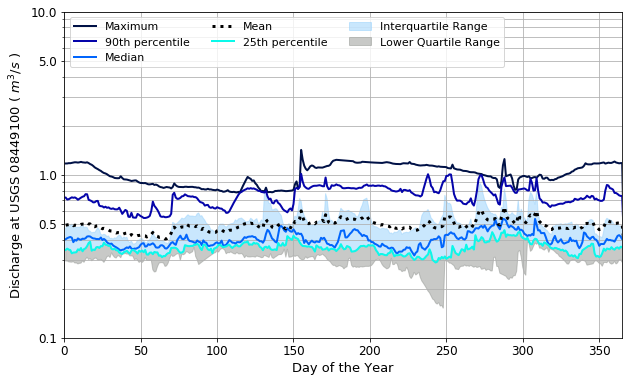

In [39]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.fill( IQRange[:,0], IQRange[:,1], color="xkcd:light blue", alpha=0.5, 
           label="Interquartile Range")
ax11.fill( LBRange[:,0], LBRange[:,1], color="xkcd:grey", alpha=0.5, 
           label="Lower Quartile Range")
ax11.plot( DayYrm3ps.index, DayYrm3ps[StatsCols[100]], linestyle='-', linewidth=2,
           color='xkcd:navy blue', label='Maximum')
ax11.plot( DayYrm3ps.index, DayYrm3ps[StatsCols[90]], linestyle='-', linewidth=2,
           color='xkcd:royal blue', label='90th percentile')
ax11.plot( DayYrm3ps.index, DayYrm3ps[StatsCols[50]], linestyle='-', linewidth=2,
           color='xkcd:bright blue', label='Median')
ax11.plot( DayYrm3ps.index, DayYrm3ps[StatsCols[101]], linestyle=':', linewidth=3,
           color='xkcd:black', label='Mean')
ax11.plot( DayYrm3ps.index, DayYrm3ps[StatsCols[25]], linestyle='-', linewidth=2,
           color='xkcd:bright aqua', label='25th percentile')
ax11.set_yscale('log')
ax11.set_xlim( (0.0, 365.0))
ax11.set_ylim( (0.1, DisM3psMax) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
ax11.set_xlabel('Day of the Year', fontsize=13 )
ax11.set_yticks( disTicks )
ax11.set_ylabel('Discharge at USGS 08449100 ( $m^{3}/s$ )', fontsize=13)
ax11.grid( b=True )
ax11.legend( loc='upper left', ncol=3, fontsize=11 )
ax11.tick_params(axis='both', which='major', labelsize=12)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [40]:
ConvCMStoCFS = ( 35.3147 / 1.0**3 )

In [41]:
IQRange[:,1] = IQRange[:,1] * ConvCMStoCFS
LBRange[:,1] = LBRange[:,1] * ConvCMStoCFS
npMax = DayYrm3ps[StatsCols[100]].to_numpy() * ConvCMStoCFS
np90p = DayYrm3ps[StatsCols[90]].to_numpy() * ConvCMStoCFS
npMed = DayYrm3ps[StatsCols[50]].to_numpy() * ConvCMStoCFS
npMean = DayYrm3ps[StatsCols[101]].to_numpy() * ConvCMStoCFS

In [42]:
OutSVG = os.path.normpath( os.path.join( r'C:\Users\nmartin\OneDrive\BRATWURST\EAA\Images_Figures',
                                         "DolanCreek_Gauge_DischargePerc_cfs.svg" ) )
OutSVG

'C:\\Users\\nmartin\\OneDrive\\BRATWURST\\EAA\\Images_Figures\\DolanCreek_Gauge_DischargePerc_cfs.svg'

In [43]:
OutPNG = os.path.normpath( os.path.join( r'C:\Users\nmartin\OneDrive\BRATWURST\EAA\Images_Figures',
                                        "DolanCreek_Gauge_DischargePerc_cfs.png" ) )
OutPNG

'C:\\Users\\nmartin\\OneDrive\\BRATWURST\\EAA\\Images_Figures\\DolanCreek_Gauge_DischargePerc_cfs.png'

In [44]:
disTicks = [ 5.0, 10.0, 50.0, 100.0, 200.0 ]

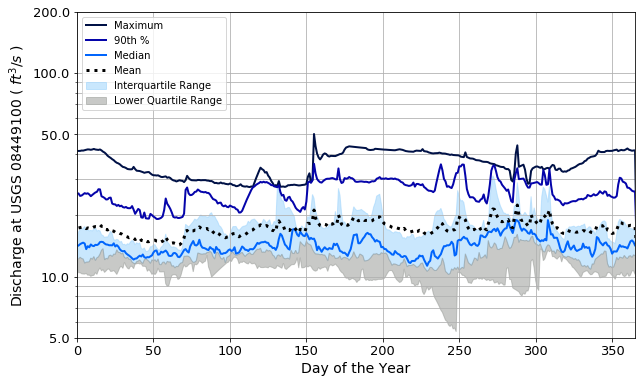

In [45]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.fill( IQRange[:,0], IQRange[:,1], color="xkcd:light blue", alpha=0.5, 
           label="Interquartile Range")
ax11.fill( LBRange[:,0], LBRange[:,1], color="xkcd:grey", alpha=0.5, 
           label="Lower Quartile Range")
ax11.plot( DayYrm3ps.index, npMax, linestyle='-', linewidth=2,
           color='xkcd:navy blue', label='Maximum')
ax11.plot( DayYrm3ps.index, np90p, linestyle='-', linewidth=2,
           color='xkcd:royal blue', label='90th %')
ax11.plot( DayYrm3ps.index, npMed, linestyle='-', linewidth=2,
           color='xkcd:bright blue', label='Median')
ax11.plot( DayYrm3ps.index, npMean, linestyle=':', linewidth=3,
           color='xkcd:black', label='Mean')
ax11.set_yscale('log')
ax11.set_xlim( (0.0, 365.0))
ax11.set_ylim( (5.0, 200.0) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_yticks( disTicks )
ax11.set_ylabel('Discharge at USGS 08449100 ( $ft^{3}/s$ )', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

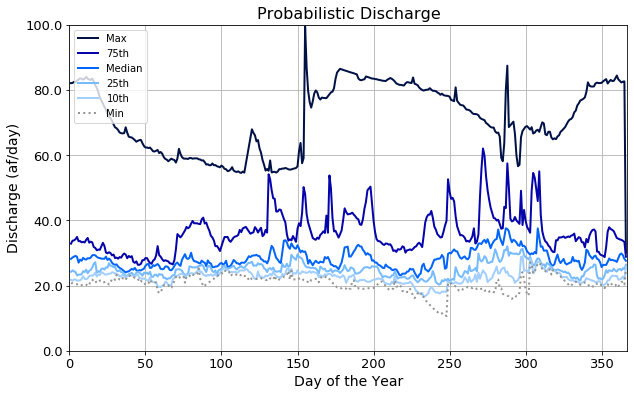

In [46]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( DayYrDF.index, DayYrDF[StatsCols[100]], linestyle='-', linewidth=2,
           color='xkcd:navy blue', label='Max')
ax11.plot( DayYrDF.index, DayYrDF[StatsCols[75]], linestyle='-', linewidth=2,
           color='xkcd:royal blue', label='75th')
ax11.plot( DayYrDF.index, DayYrDF[StatsCols[50]], linestyle='-', linewidth=2,
           color='xkcd:bright blue', label='Median')
ax11.plot( DayYrDF.index, DayYrDF[StatsCols[25]], linestyle='-', linewidth=2,
           color='xkcd:sky blue', label='25th')
ax11.plot( DayYrDF.index, DayYrDF[StatsCols[10]], linestyle='-', linewidth=2,
           color='xkcd:baby blue', label='10th')
ax11.plot( DayYrDF.index, DayYrDF[StatsCols[0]], linestyle=':', linewidth=2,
           color='xkcd:grey', label='Min')
ax11.set_xlim( (0.0, 367.0))
ax11.set_ylim( (0.0, DisMax) )
ax11.set_title("Probabilistic Discharge", fontsize=16)
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Discharge (af/day)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Fourier Smoothing for Baseflow

If baseflow is truly groundwater flow and not not subsurface runoff or near surface runoff, then fourier smoothing should give a fairly flat discharge across the year for the percentages that represent baseflow.

In [47]:
DY05P = DayYrDF[StatsCols[5]].to_numpy()
DY10P = DayYrDF[StatsCols[10]].to_numpy()
DY15P = DayYrDF[StatsCols[15]].to_numpy()
DY20P = DayYrDF[StatsCols[20]].to_numpy()
DY25P = DayYrDF[StatsCols[25]].to_numpy()
DY50P = DayYrDF[StatsCols[50]].to_numpy()
DY75P = DayYrDF[StatsCols[75]].to_numpy()

In [48]:
rft = np.fft.rfft(DY05P)
rft[3:] = 0.0
DY05P_smooth = np.fft.irfft(rft)
rft = np.fft.rfft(DY10P)
rft[3:] = 0.0
DY10P_smooth = np.fft.irfft(rft)
rft = np.fft.rfft(DY15P)
rft[3:] = 0.0
DY15P_smooth = np.fft.irfft(rft)
rft = np.fft.rfft(DY20P)
rft[3:] = 0.0
DY20P_smooth = np.fft.irfft(rft)
rft = np.fft.rfft(DY25P)
rft[3:] = 0.0
DY25P_smooth = np.fft.irfft(rft)
rft = np.fft.rfft(DY50P)
rft[3:] = 0.0
DY50P_smooth = np.fft.irfft(rft)
rft = np.fft.rfft(DY75P)
rft[3:] = 0.0
DY75P_smooth = np.fft.irfft(rft)

In [49]:
DY05P_smooth.mean(), DY10P_smooth.mean(), DY15P_smooth.mean(), DY20P_smooth.mean(), DY25P_smooth.mean(), DY50P_smooth.mean(), DY75P_smooth.mean()

(21.558905948055248,
 22.525098654741797,
 23.456379791426528,
 24.181453470323905,
 24.90815940189883,
 28.251670097392765,
 36.34165243242608)

These numbers are all fairly close together. Assume that have 25% baseflow for a value of 24.9 AF/day

In [50]:
BFAssumeAFd = 24.9
BFlowCon = np.array( [ BFAssumeAFd for x in range(366) ], dtype=np.float32 )

In [51]:
OutSVG = os.path.normpath( os.path.join( r'C:\Users\nmartin\OneDrive\BRATWURST\EAA\Images_Figures',
                                         "DolanCreek_FSmoothPerc_afd.svg" ) )
OutSVG

'C:\\Users\\nmartin\\OneDrive\\BRATWURST\\EAA\\Images_Figures\\DolanCreek_FSmoothPerc_afd.svg'

In [52]:
OutPNG = os.path.normpath( os.path.join( r'C:\Users\nmartin\OneDrive\BRATWURST\EAA\Images_Figures',
                                         "DolanCreek_FSmoothPerc_afd.png" ) )
OutPNG

'C:\\Users\\nmartin\\OneDrive\\BRATWURST\\EAA\\Images_Figures\\DolanCreek_FSmoothPerc_afd.png'

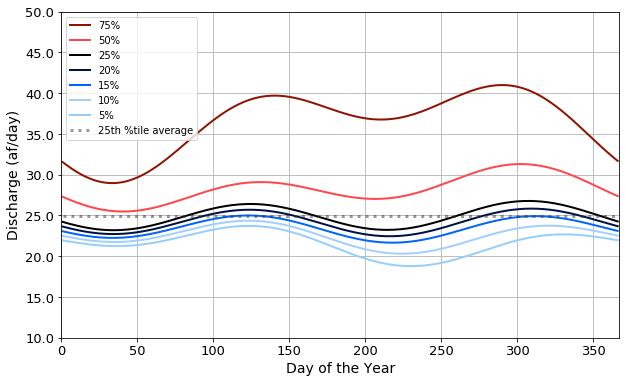

In [53]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( DayYrDF.index, DY75P_smooth, linestyle='-', linewidth=2,
           color='xkcd:brick red', label='75%')
ax11.plot( DayYrDF.index, DY50P_smooth, linestyle='-', linewidth=2,
           color='xkcd:light red', label='50%')
ax11.plot( DayYrDF.index, DY25P_smooth, linestyle='-', linewidth=2,
           color='xkcd:black', label='25%')
ax11.plot( DayYrDF.index, DY20P_smooth, linestyle='-', linewidth=2,
           color='xkcd:navy blue', label='20%')
ax11.plot( DayYrDF.index, DY15P_smooth, linestyle='-', linewidth=2,
           color='xkcd:bright blue', label='15%')
ax11.plot( DayYrDF.index, DY10P_smooth, linestyle='-', linewidth=2,
           color='xkcd:baby blue', label='10%')
ax11.plot( DayYrDF.index, DY05P_smooth, linestyle='-', linewidth=2,
           color='xkcd:light blue', label='5%')
ax11.plot( DayYrDF.index, BFlowCon, linestyle=':', linewidth=3,
           color='xkcd:dark grey', label='25th %tile average', alpha=0.5 )
ax11.set_xlim( (0.0, 367.0))
ax11.set_ylim( (10.0, 50.0) )
#ax11.set_title("Smoothed Percentile Discharges", fontsize=16)
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Discharge (af/day)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

The number of components maintained in the Fourier Smoothing is sufficient to provide for seasonal variation. Towards the end of the summer, the various percentiles have the largest variance. In the winter, the variance is much smaller.

Output these as a spreadsheet so that can use them for watershed runoff analysis

In [54]:
DataDict = { "5th_Perc" : DY05P_smooth,
             "10th_Perc" : DY10P_smooth,
             "15th_Perc" : DY15P_smooth,
             "20th_Perc" : DY20P_smooth,
             "25th_Perc" : DY25P_smooth,
             "50th_Perc" : DY50P_smooth,
             "75th_Perc" : DY75P_smooth, }
SmPercDF = pd.DataFrame( index=DayYrDF.index, data=DataDict )

In [55]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "Smoothed_DailyPercentiles.xlsx"))
with pd.ExcelWriter(OutFiler) as writer:
    SmPercDF.to_excel(writer, sheet_name="Smoothed_Percentiles", na_rep=str(np.nan), index_label="Day_of_Year" )
# end of with